In [1]:
import numpy as np
import math
#用pandas读取外部文件
import pandas as pd
#绘图
import matplotlib.pyplot as plt



import numpy as np
from pandas.plotting import scatter_matrix
#sklearn分类需要的类
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

#打分
from sklearn.metrics import accuracy_score


#逻辑回归算法
from sklearn.linear_model import LogisticRegression
#交叉验证
from sklearn.model_selection import cross_val_score
#决策树
from sklearn.tree import DecisionTreeClassifier
#K-Means
from sklearn.cluster import KMeans
#贝叶斯
from sklearn.naive_bayes import GaussianNB
#支持向量机SVM
from sklearn.svm import SVC


## 读文件

In [46]:
test = pd.read_csv("./T05 McTitanic(最终简版)/T05 McTitanic(最终简版)/data/test.csv")
train = pd.read_csv("./T05 McTitanic(最终简版)/T05 McTitanic(最终简版)/data/train.csv")
gender_submission = pd.read_csv("./T05 McTitanic(最终简版)/T05 McTitanic(最终简版)/data/gender_submission.csv")

In [35]:
test.head()
train.head()
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [9]:
train.head()
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## 合并文件

In [47]:
full_test = pd.merge(test, gender_submission, on="PassengerId", how="left")
full_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [48]:
titanic = pd.concat([train, full_test]) # 默认按行
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [39]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 132.9+ KB


In [23]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.377387,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.484918,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


## 处理缺失值

In [49]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [29]:
titanic.shape

(1309, 12)

In [50]:
saved = titanic.copy()  #防止数据丢失

In [72]:
titanic = saved.copy()

In [98]:
titanic.loc[titanic.Cabin.notnull(), "Cabin"] = 1
titanic.loc[titanic.Cabin.isnull(), "Cabin"] = 0
titanic.Cabin.head()


0    0
1    1
2    0
3    1
4    0
Name: Cabin, dtype: object

In [52]:
titanic.Cabin.sum()

295

In [55]:
male_age = titanic.loc[(titanic.Sex=="male") & (titanic.Age.notnull()), "Age"].mean()
female_age = titanic.loc[(titanic.Sex=="female") & (titanic.Age.notnull()), "Age"].mean()

In [71]:
print(male_age, "\n", female_age)

30.58522796352584 
 28.68708762886598


In [74]:
titanic.loc[titanic.Sex=="male", "Age"] = titanic.loc[titanic.Sex=="male", "Age"].fillna(male_age)
titanic.loc[titanic.Sex=="female", "Age"] = titanic.loc[titanic.Sex=="female", "Age"].fillna(female_age)

In [75]:
titanic.Age.isnull().sum()

0

In [73]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [77]:
median_fare = titanic.loc[(titanic.Pclass==3) & (titanic.Fare.notnull()), "Fare"].median()

In [78]:
median_fare

8.05

In [79]:
titanic.Fare.fillna(median_fare, inplace=True)
titanic.Fare.isnull().sum()

0

In [82]:
titanic.Embarked.isnull().sum()

2

In [92]:
embarked_mode = titanic.loc[titanic.Embarked.notnull() , "Embarked"].mode()[0]
embarked_mode

'S'

In [94]:
titanic.loc[titanic.Embarked.isnull(), "Embarked"] = embarked_mode

In [93]:
embarked_mode

'S'

In [95]:
titanic.Embarked.isnull().sum()

0

### 验证是否处理成功所有空值

In [104]:
titanic.isnull().isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [99]:
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,1,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,1,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,0,S
5,6,0,3,"Moran, Mr. James",male,30.585228,0,0,330877,8.4583,0,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,1,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,0,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,0,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,0,C


## 数据分析

In [107]:
titanic.Survived.value_counts()

Survived
0    815
1    494
Name: count, dtype: int64

In [109]:
plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号

# plt.style.use('ggplot')   # R 中的 ggplot 的效果

In [105]:
save_count = titanic.Survived.sum()
save_count

494

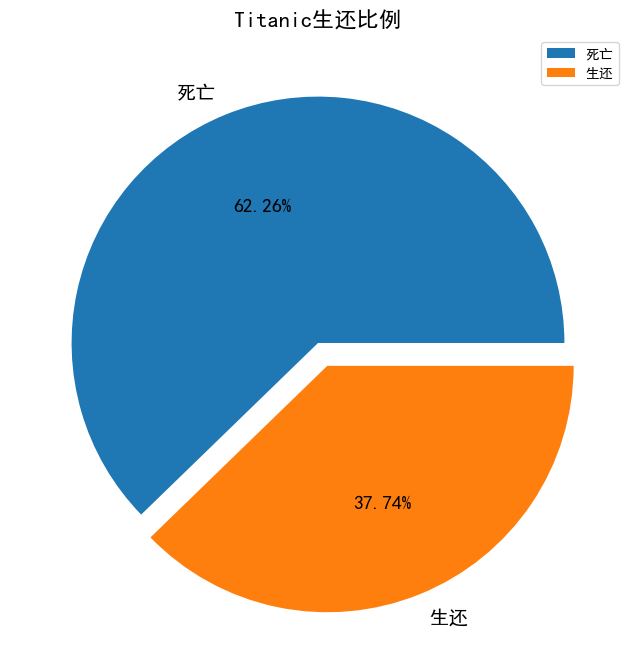

In [110]:
totalscale = titanic['Survived'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(totalscale.values , 
        labels = ['死亡','生还'], 
#         shadow=True,
        explode=[0,0.1],
        textprops={'fontsize':14,'color':'black'},
        autopct='%1.2f%%')
# 添加图标题
plt.title('Titanic生还比例',fontdict={'fontweight':500, 'size':16}) #字体粗细  大小

plt.legend()
plt.show()

In [111]:
# 筛选年龄和性别数据
age_df = titanic.loc[:, ['Survived','Age','Sex']]
age_df.head()

,Survived,Age,Sex
0,0,22.0,male
1,1,38.0,female
2,1,26.0,female
3,1,35.0,female
4,0,35.0,male


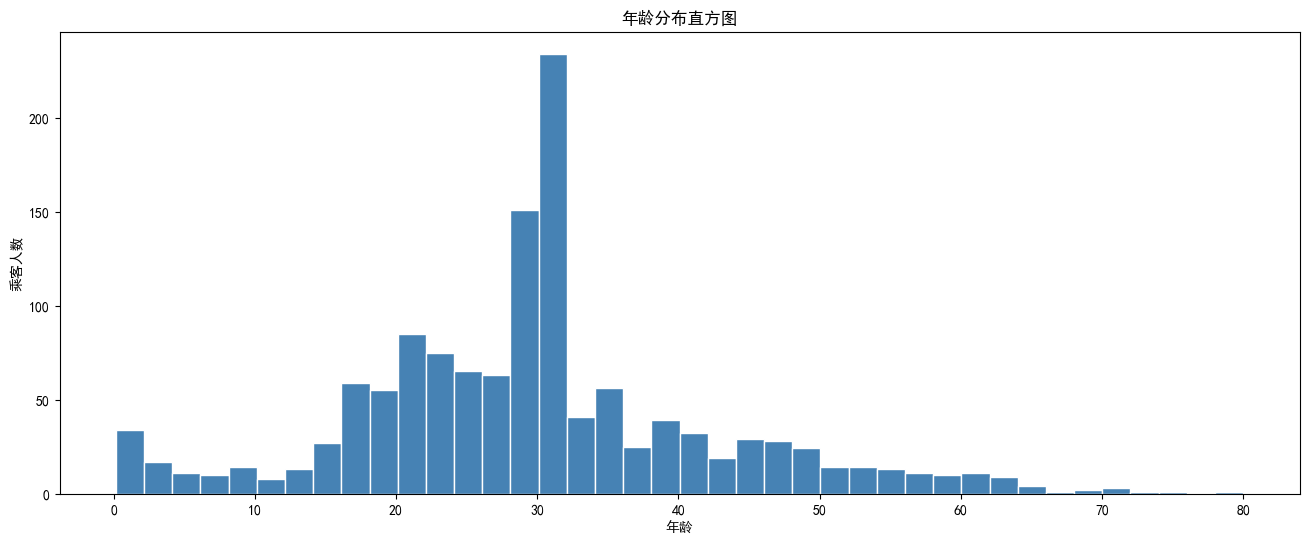

In [112]:
fig = plt.figure( figsize =(16,6) )

plt.hist( age_df['Age'],bins = 40, color = 'steelblue', edgecolor = 'w' )
plt.xlabel('年龄')
plt.ylabel('乘客人数')
plt.title('年龄分布直方图')

plt.show()

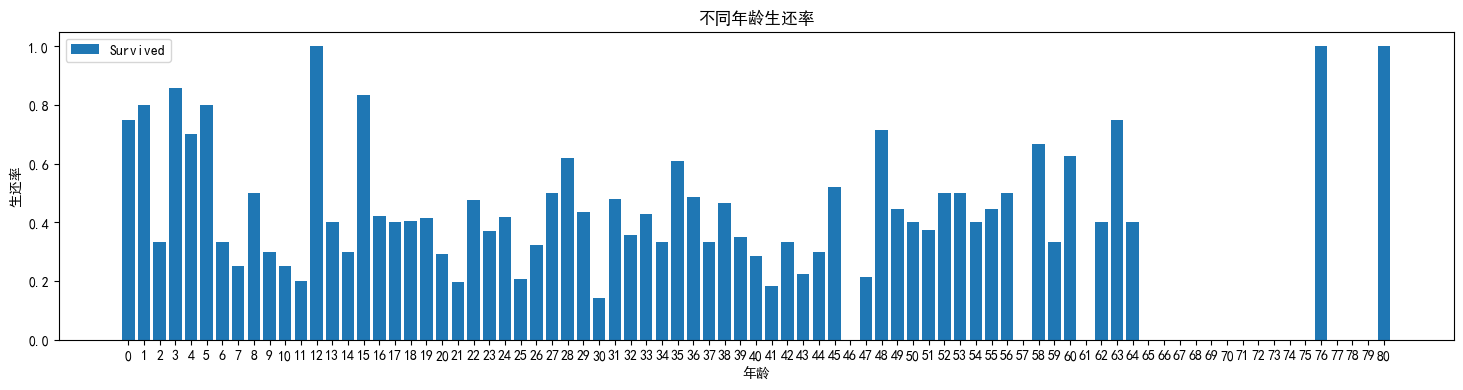

In [113]:
# 不同年龄下的平均生存率：
fig,axis1 = plt.subplots(1,1,figsize=(18,4))
titanic['Age_int'] = titanic['Age'].astype(int)  # 或者 .apply(lambda x:int(x))
average_age = titanic.loc[:, ["Age_int", "Survived"]].groupby(['Age_int']).mean().reset_index()
# 或者这样写
# average_age = titanic.loc[:, ["Age_int", "Survived"]].groupby(['Age_int'],as_index=False).mean()

# 绘制柱形图
plt.bar(average_age['Age_int'], average_age['Survived'], label='Survived')

# 添加图例
plt.legend()
plt.xticks(np.arange(0,81))
plt.xlabel('年龄')
plt.ylabel('生还率')
plt.title('不同年龄生还率')

plt.show()

In [114]:
#筛选SibSp、Parch数据
sp_df = titanic.loc[:, ['Survived','SibSp','Parch']]
sp_df.head()

,Survived,SibSp,Parch
0,0,1,0
1,1,1,0
2,1,0,0
3,1,1,0
4,0,0,0


In [115]:
fare_df = titanic.loc[:, ['Survived','Pclass','Fare']]

In [116]:
fare_df.groupby(['Pclass']).agg({'Survived':'sum','Fare':'mean'})

,Survived,Fare
Pclass,,
1,186,87.508992
2,117,21.179196
3,191,13.295480


In [117]:
titanic.loc[titanic.Sex=="male","Sex"]=1  #性别数值化
titanic.loc[titanic.Sex=="female","Sex"]=0 
t_data=titanic.loc[:,["Sex","Age","Pclass","Cabin","Fare"]]  #特征集
t_target=titanic.loc[:,'Survived'] #结果集
t_data.head()
#t_target.head()

,Sex,Age,Pclass,Cabin,Fare
0,1,22.0,3,0,7.2500
1,0,38.0,1,1,71.2833
2,0,26.0,3,0,7.9250
3,0,35.0,1,1,53.1000
4,1,35.0,3,0,8.0500


In [118]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
x_train,x_test,y_train,y_test=train_test_split(t_data,t_target,random_state=1)
model = GaussianNB() 
model.fit(x_train,y_train) 
y_pre=model.predict(x_test)
print(accuracy_score(y_test,y_pre)) 

0.7987804878048781
